In [145]:
import torch
from torch import nn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from torch import optim
import matplotlib as mpl

In [128]:
df = pd.read_csv('data.csv')
sc = StandardScaler()
features = df[["CNT","Si3N4","SPEED","DEPTH"]]
df_new = sc.fit_transform(features)
#df_new = pd.DataFrame(df_new)
x_train, x_test, y_train, y_test = train_test_split(df_new, df[["TENSILE"]], test_size=0.15, random_state=42)

C:\Users\Dell\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dell\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [129]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train.to_numpy())

In [130]:
model = nn.Sequential(nn.Linear(4, 3),
                      nn.Linear(3,2),
                      nn.Linear(2, 1))

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

x = []
y = []
epochs = 4000
for e in range(epochs):
    running_loss = 0
    optimizer.zero_grad()
    output = model(x_train.float())
    loss = criterion(output, y_train.float())
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    print(f"Training loss: {running_loss/len(x_train)}")
    if(e % 250 == 0):
        x.append(e)
        y.append(running_loss/len(x_train))

Training loss: 10941.43125
Training loss: 10935.09765625
Training loss: 10928.8734375
Training loss: 10922.64375
Training loss: 10916.29765625
Training loss: 10909.71875
Training loss: 10902.77890625
Training loss: 10895.31875
Training loss: 10887.1484375
Training loss: 10878.0171875
Training loss: 10867.5953125
Training loss: 10855.42890625
Training loss: 10840.87890625
Training loss: 10823.01875
Training loss: 10800.4578125
Training loss: 10771.03984375
Training loss: 10731.2765625
Training loss: 10675.26015625
Training loss: 10592.4390625
Training loss: 10462.834375
Training loss: 10245.97734375
Training loss: 9853.83515625
Training loss: 9082.02890625
Training loss: 7450.240625
Training loss: 4108.325390625
Training loss: 224.274365234375
Training loss: 161.92723388671874
Training loss: 243.16875
Training loss: 184.1881103515625
Training loss: 287.592236328125
Training loss: 205.8074951171875
Training loss: 325.425732421875
Training loss: 222.007958984375
Training loss: 353.6240722

Training loss: 169.68316650390625
Training loss: 247.896240234375
Training loss: 169.0562255859375
Training loss: 246.779931640625
Training loss: 168.4314697265625
Training loss: 245.668408203125
Training loss: 167.80771484375
Training loss: 244.5601806640625
Training loss: 167.18599853515624
Training loss: 243.456884765625
Training loss: 166.56595458984376
Training loss: 242.358056640625
Training loss: 165.94716796875
Training loss: 241.2628662109375
Training loss: 165.33092041015624
Training loss: 240.173291015625
Training loss: 164.71614990234374
Training loss: 239.087744140625
Training loss: 164.10279541015626
Training loss: 238.006103515625
Training loss: 163.4914306640625
Training loss: 236.9291259765625
Training loss: 162.88201904296875
Training loss: 235.8570068359375
Training loss: 162.2744140625
Training loss: 234.789208984375
Training loss: 161.66798095703126
Training loss: 233.724951171875
Training loss: 161.0635498046875
Training loss: 232.6652587890625
Training loss: 160.

Training loss: 139.5711669921875
Training loss: 104.3061767578125
Training loss: 138.9130126953125
Training loss: 103.88319091796875
Training loss: 138.2573974609375
Training loss: 103.46156005859375
Training loss: 137.6046142578125
Training loss: 103.041552734375
Training loss: 136.9550537109375
Training loss: 102.62294921875
Training loss: 136.30848388671876
Training loss: 102.20584106445312
Training loss: 135.6647216796875
Training loss: 101.79031982421876
Training loss: 135.0240478515625
Training loss: 101.37643432617188
Training loss: 134.38626708984376
Training loss: 100.96355590820312
Training loss: 133.7510986328125
Training loss: 100.55242919921875
Training loss: 133.11893310546876
Training loss: 100.14251708984375
Training loss: 132.489208984375
Training loss: 99.73406982421875
Training loss: 131.86246337890626
Training loss: 99.32705078125
Training loss: 131.2387939453125
Training loss: 98.92178955078126
Training loss: 130.61807861328126
Training loss: 98.51776123046875
Trai

Training loss: 76.79415283203124
Training loss: 61.81959228515625
Training loss: 76.42551879882812
Training loss: 61.555419921875
Training loss: 76.05894775390625
Training loss: 61.292083740234375
Training loss: 75.6937255859375
Training loss: 61.02989501953125
Training loss: 75.330517578125
Training loss: 60.76864013671875
Training loss: 74.96881103515625
Training loss: 60.508660888671876
Training loss: 74.60922241210938
Training loss: 60.24957275390625
Training loss: 74.25087890625
Training loss: 59.991455078125
Training loss: 73.89442138671875
Training loss: 59.73443603515625
Training loss: 73.53972778320312
Training loss: 59.47847900390625
Training loss: 73.18670654296875
Training loss: 59.22357177734375
Training loss: 72.83535766601562
Training loss: 58.96949462890625
Training loss: 72.48543701171874
Training loss: 58.716339111328125
Training loss: 72.13710327148438
Training loss: 58.4642822265625
Training loss: 71.7906005859375
Training loss: 58.213507080078124
Training loss: 71.

Training loss: 42.32389526367187
Training loss: 36.096038818359375
Training loss: 42.12207946777344
Training loss: 35.93851013183594
Training loss: 41.921148681640624
Training loss: 35.78172912597656
Training loss: 41.721282958984375
Training loss: 35.62568969726563
Training loss: 41.52249450683594
Training loss: 35.470245361328125
Training loss: 41.324658203125
Training loss: 35.31559753417969
Training loss: 41.12777404785156
Training loss: 35.16141967773437
Training loss: 40.931765747070315
Training loss: 35.008123779296874
Training loss: 40.73679809570312
Training loss: 34.855282592773435
Training loss: 40.54274291992188
Training loss: 34.70320434570313
Training loss: 40.34961853027344
Training loss: 34.551797485351564
Training loss: 40.15756530761719
Training loss: 34.401101684570314
Training loss: 39.966452026367186
Training loss: 34.250970458984376
Training loss: 39.77626342773438
Training loss: 34.10160522460937
Training loss: 39.58699035644531
Training loss: 33.952737426757814


Training loss: 21.203897094726564
Training loss: 23.681620788574218
Training loss: 21.112277221679687
Training loss: 23.571835327148438
Training loss: 21.02109375
Training loss: 23.46277618408203
Training loss: 20.930538940429688
Training loss: 23.35437774658203
Training loss: 20.84021453857422
Training loss: 23.24635009765625
Training loss: 20.75036163330078
Training loss: 23.138825988769533
Training loss: 20.66084442138672
Training loss: 23.03193054199219
Training loss: 20.57189178466797
Training loss: 22.925578308105468
Training loss: 20.48321075439453
Training loss: 22.81968536376953
Training loss: 20.394882202148438
Training loss: 22.71424255371094
Training loss: 20.307005310058592
Training loss: 22.60943603515625
Training loss: 20.219515991210937
Training loss: 22.505099487304687
Training loss: 20.132443237304688
Training loss: 22.401248168945312
Training loss: 20.045718383789062
Training loss: 22.298002624511717
Training loss: 19.95953826904297
Training loss: 22.19536437988281
T

Training loss: 12.632078552246094
Training loss: 13.639541625976562
Training loss: 12.579924011230469
Training loss: 13.579937744140626
Training loss: 12.528025054931641
Training loss: 13.520700073242187
Training loss: 12.476461029052734
Training loss: 13.46178741455078
Training loss: 12.425099182128907
Training loss: 13.403178405761718
Training loss: 12.374015045166015
Training loss: 13.344828796386718
Training loss: 12.323039245605468
Training loss: 13.286708068847656
Training loss: 12.272353363037109
Training loss: 13.228836059570312
Training loss: 12.221876525878907
Training loss: 13.171328735351562
Training loss: 12.17165756225586
Training loss: 13.114096069335938
Training loss: 12.121622467041016
Training loss: 13.057121276855469
Training loss: 12.071883392333984
Training loss: 13.000436401367187
Training loss: 12.022353363037109
Training loss: 12.944046020507812
Training loss: 11.973040771484374
Training loss: 12.887919616699218
Training loss: 11.923954010009766
Training loss: 1

Training loss: 7.752973175048828
Training loss: 8.15645751953125
Training loss: 7.723825836181641
Training loss: 8.124296569824219
Training loss: 7.694811248779297
Training loss: 8.092298126220703
Training loss: 7.665972900390625
Training loss: 8.060514831542969
Training loss: 7.6372734069824215
Training loss: 8.028900909423829
Training loss: 7.608653259277344
Training loss: 7.9973396301269535
Training loss: 7.5801643371582035
Training loss: 7.965952301025391
Training loss: 7.551844787597656
Training loss: 7.934733581542969
Training loss: 7.523548889160156
Training loss: 7.903588104248047
Training loss: 7.495445251464844
Training loss: 7.872697448730468
Training loss: 7.467555236816406
Training loss: 7.841987609863281
Training loss: 7.439765930175781
Training loss: 7.811412811279297
Training loss: 7.412095642089843
Training loss: 7.780979156494141
Training loss: 7.384532928466797
Training loss: 7.750648498535156
Training loss: 7.357076263427734
Training loss: 7.7204231262207035
Trainin

Training loss: 5.018890762329102
Training loss: 5.178174591064453
Training loss: 5.002782821655273
Training loss: 5.160880279541016
Training loss: 4.986782073974609
Training loss: 5.143688201904297
Training loss: 4.970838165283203
Training loss: 5.126549148559571
Training loss: 4.954955291748047
Training loss: 5.109529876708985
Training loss: 4.939177703857422
Training loss: 5.092580795288086
Training loss: 4.923435211181641
Training loss: 5.075723266601562
Training loss: 4.907839965820313
Training loss: 5.058959197998047
Training loss: 4.892330169677734
Training loss: 5.042334747314453
Training loss: 4.87684440612793
Training loss: 5.025719833374024
Training loss: 4.861466979980468
Training loss: 5.0092521667480465
Training loss: 4.84615478515625
Training loss: 4.992815399169922
Training loss: 4.8308860778808596
Training loss: 4.976443099975586
Training loss: 4.8157188415527346
Training loss: 4.96019287109375
Training loss: 4.800609588623047
Training loss: 4.9439697265625
Training los

Training loss: 3.586167907714844
Training loss: 3.5143287658691404
Training loss: 3.5767902374267577
Training loss: 3.505481719970703
Training loss: 3.5674888610839846
Training loss: 3.4967269897460938
Training loss: 3.5582660675048827
Training loss: 3.4879852294921876
Training loss: 3.549054718017578
Training loss: 3.4793022155761717
Training loss: 3.5399024963378904
Training loss: 3.4706256866455076
Training loss: 3.53077392578125
Training loss: 3.4620479583740233
Training loss: 3.521736907958984
Training loss: 3.4534576416015623
Training loss: 3.5126930236816407
Training loss: 3.444933319091797
Training loss: 3.5036998748779298
Training loss: 3.436403274536133
Training loss: 3.4947662353515625
Training loss: 3.427956390380859
Training loss: 3.485872268676758
Training loss: 3.419557571411133
Training loss: 3.4770397186279296
Training loss: 3.411235046386719
Training loss: 3.468272018432617
Training loss: 3.402862548828125
Training loss: 3.459459686279297
Training loss: 3.394562911987

Training loss: 2.729638671875
Training loss: 2.6998767852783203
Training loss: 2.724538230895996
Training loss: 2.6949899673461912
Training loss: 2.719475746154785
Training loss: 2.6901546478271485
Training loss: 2.7144336700439453
Training loss: 2.6853281021118165
Training loss: 2.7094369888305665
Training loss: 2.680531311035156
Training loss: 2.7044668197631836
Training loss: 2.6757699966430666
Training loss: 2.6995098114013674
Training loss: 2.6710281372070312
Training loss: 2.6945873260498048
Training loss: 2.666300964355469
Training loss: 2.6896820068359375
Training loss: 2.6616039276123047
Training loss: 2.68480224609375
Training loss: 2.656919479370117
Training loss: 2.679946517944336
Training loss: 2.6522409439086916
Training loss: 2.675075912475586
Training loss: 2.6475854873657227
Training loss: 2.670256423950195
Training loss: 2.642978286743164
Training loss: 2.665471839904785
Training loss: 2.6383716583251955
Training loss: 2.6606958389282225
Training loss: 2.6338180541992

Training loss: 2.2635051727294924
Training loss: 2.251102828979492
Training loss: 2.260744094848633
Training loss: 2.2484210968017577
Training loss: 2.2579723358154298
Training loss: 2.245736312866211
Training loss: 2.255241584777832
Training loss: 2.243094062805176
Training loss: 2.2525152206420898
Training loss: 2.2404605865478517
Training loss: 2.2498043060302733
Training loss: 2.2378314971923827
Training loss: 2.2470970153808594
Training loss: 2.2352121353149412
Training loss: 2.2444114685058594
Training loss: 2.2325908660888674
Training loss: 2.241725540161133
Training loss: 2.230002212524414
Training loss: 2.2390708923339844
Training loss: 2.227437400817871
Training loss: 2.2364282608032227
Training loss: 2.224858856201172
Training loss: 2.233776092529297
Training loss: 2.222291946411133
Training loss: 2.231143569946289
Training loss: 2.219760704040527
Training loss: 2.228535461425781
Training loss: 2.2172321319580077
Training loss: 2.2259504318237306
Training loss: 2.21471614837

Training loss: 2.0093896865844725
Training loss: 2.0041675567626953
Training loss: 2.0078765869140627
Training loss: 2.0026828765869142
Training loss: 2.0063730239868165
Training loss: 2.0012264251708984
Training loss: 2.0048854827880858
Training loss: 1.9997638702392577
Training loss: 2.0033769607543945
Training loss: 1.9983003616333008
Training loss: 2.0018989562988283
Training loss: 1.996854019165039
Training loss: 2.0004194259643553
Training loss: 1.9954242706298828
Training loss: 1.9989585876464844
Training loss: 1.9939912796020507
Training loss: 1.9975032806396484
Training loss: 1.9925575256347656
Training loss: 1.9960460662841797
Training loss: 1.9911357879638671
Training loss: 1.9945953369140625
Training loss: 1.9897319793701171
Training loss: 1.9931560516357423
Training loss: 1.988326644897461
Training loss: 1.991727066040039
Training loss: 1.9869272232055664
Training loss: 1.9903003692626953
Training loss: 1.985524559020996
Training loss: 1.988863182067871
Training loss: 1.98

Training loss: 1.869169044494629
Training loss: 1.870570182800293
Training loss: 1.8683446884155273
Training loss: 1.8697446823120116
Training loss: 1.8675329208374023
Training loss: 1.8689163208007813
Training loss: 1.8667139053344726
Training loss: 1.8680919647216796
Training loss: 1.865920639038086
Training loss: 1.867276954650879
Training loss: 1.8651119232177735
Training loss: 1.8664661407470704
Training loss: 1.864328384399414
Training loss: 1.8656675338745117
Training loss: 1.8635412216186524
Training loss: 1.8648710250854492
Training loss: 1.862764549255371
Training loss: 1.86407527923584
Training loss: 1.8619768142700195
Training loss: 1.86328125
Training loss: 1.8611896514892579
Training loss: 1.862483024597168
Training loss: 1.8604047775268555
Training loss: 1.8616880416870116
Training loss: 1.859636116027832
Training loss: 1.8609121322631836
Training loss: 1.8588645935058594
Training loss: 1.8601251602172852
Training loss: 1.8581045150756836
Training loss: 1.859366035461425

Training loss: 1.7948144912719726
Training loss: 1.7953340530395507
Training loss: 1.7943729400634765
Training loss: 1.7948822021484374
Training loss: 1.7939281463623047
Training loss: 1.794427490234375
Training loss: 1.7934810638427734
Training loss: 1.7939807891845703
Training loss: 1.793039894104004
Training loss: 1.793531608581543
Training loss: 1.7925968170166016
Training loss: 1.7930917739868164
Training loss: 1.7921585083007812
Training loss: 1.7926450729370118
Training loss: 1.7917240142822266
Training loss: 1.7922039031982422
Training loss: 1.7912837982177734
Training loss: 1.7917713165283202
Training loss: 1.7908563613891602
Training loss: 1.791326141357422
Training loss: 1.7904180526733398
Training loss: 1.790883445739746
Training loss: 1.7899837493896484
Training loss: 1.790456199645996
Training loss: 1.789571189880371
Training loss: 1.7900426864624024
Training loss: 1.7891580581665039
Training loss: 1.789619255065918
Training loss: 1.7887399673461915
Training loss: 1.78920

Training loss: 1.7540264129638672
Training loss: 1.7536006927490235
Training loss: 1.7537691116333007
Training loss: 1.7533435821533203
Training loss: 1.7535263061523438
Training loss: 1.753101921081543
Training loss: 1.7532672882080078
Training loss: 1.7528568267822267
Training loss: 1.7530246734619142
Training loss: 1.7526159286499023
Training loss: 1.7527769088745118
Training loss: 1.7523700714111328
Training loss: 1.7525394439697266
Training loss: 1.7521345138549804
Training loss: 1.7522968292236327
Training loss: 1.751889419555664
Training loss: 1.7520574569702148
Training loss: 1.7516557693481445
Training loss: 1.751816177368164
Training loss: 1.751418685913086
Training loss: 1.7515785217285156
Training loss: 1.7511819839477538
Training loss: 1.7513389587402344
Training loss: 1.7509456634521485
Training loss: 1.7510971069335937
Training loss: 1.7507085800170898
Training loss: 1.750864028930664
Training loss: 1.750474739074707
Training loss: 1.750629997253418
Training loss: 1.7502

Training loss: 1.7312732696533204
Training loss: 1.731083297729492
Training loss: 1.731137466430664
Training loss: 1.7309497833251952
Training loss: 1.7309972763061523
Training loss: 1.7308063507080078
Training loss: 1.730865478515625
Training loss: 1.7306758880615234
Training loss: 1.7307283401489257
Training loss: 1.730538558959961
Training loss: 1.7305879592895508
Training loss: 1.730398941040039
Training loss: 1.7304494857788086
Training loss: 1.7302677154541015
Training loss: 1.7303079605102538
Training loss: 1.730126953125
Training loss: 1.730177879333496
Training loss: 1.7299972534179688
Training loss: 1.7300445556640625
Training loss: 1.7298648834228516
Training loss: 1.7299062728881835
Training loss: 1.7297235488891602
Training loss: 1.7297740936279298
Training loss: 1.7295948028564454
Training loss: 1.7296455383300782
Training loss: 1.7294662475585938
Training loss: 1.7295137405395509
Training loss: 1.7293399810791015
Training loss: 1.7293912887573242
Training loss: 1.7292114

In [132]:
print(x)
print(y)

[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750]
[10941.43125, 172.2093505859375, 106.01292724609375, 62.88790283203125, 36.572653198242186, 21.203897094726564, 12.476461029052734, 7.608653259277344, 4.923435211181641, 3.4534576416015623, 2.6522409439086916, 2.2172321319580077, 1.9813793182373047, 1.8536413192749024, 1.7846622467041016, 1.7473834991455077]


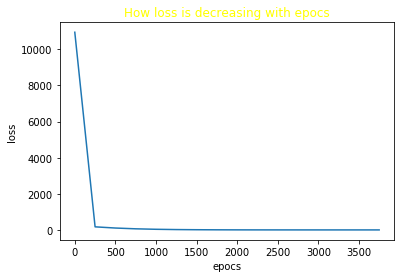

In [141]:
from matplotlib import pyplot as plt 

mpl.rcParams['text.color'] = 'yellow'
plt.title("How loss is decreasing with epocs") 
plt.xlabel("epocs") 
plt.ylabel("loss") 
plt.plot(x,y) 
plt.show()

In [136]:
x_test = torch.from_numpy(x_test)
with torch.no_grad():
    y_pred = model(x_test.float())
    
print(y_pred)

tensor([[418.7621],
        [515.0216],
        [377.7043],
        [498.6037]])


In [137]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

7.391883850097656

In [144]:
a = float(input())
b = float(input())
c = float(input())
d = float(input())

f = np.array([[a,b,c,d]])
f = sc.transform(f)
f = torch.from_numpy(f)
with torch.no_grad():
    pred = model(f.float())
    
print(pred)

0.05
0.13
1200
0.5
tensor([[527.2823]])
